In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from mpmath_integration import quad_phi

In [85]:
instance = 'instances/instances_x_eq_mu_small.csv'
instance = 'instances/instances_x_eq_mu_small_series.csv'
# instance = 'instances/instances_x_eq_mu_large_series.csv'

In [86]:
df = pd.read_csv(instance)

In [87]:
df

,alpha,beta,delta,mpmath,scipy,gnp
0,5.118265,-0.801705,5.423311,0.795071,0.795071,0.795071
1,9.504642,-9.009611,9.678838,1.000000,1.000000,1.000000
2,1.441682,-0.956373,7.047854,0.987242,0.987242,0.987242
3,9.486500,4.728287,5.452298,0.000107,0.000107,0.000107
4,3.118383,-2.591871,4.636804,0.999807,0.999807,0.999807
...,...,...,...,...,...,...
995,1.859223,0.243255,1.817263,0.407787,0.407787,0.407787
996,1.746973,1.526826,1.825832,0.040829,0.040829,0.040829
997,0.271128,-0.260691,1.542334,0.738029,0.738029,0.738029
998,1.583621,1.156987,0.237210,0.343960,0.343960,0.343960


In [88]:
df.loc[df['scipy'] == 'NAN', 'scipy'] = np.NaN
df['scipy'] = df['scipy'].astype(float)

df.loc[df['gnp'] == 'NAN', 'gnp'] = np.NaN
df['gnp'] = df['gnp'].astype(float)

In [89]:
df['relerr_gnp'] = np.absolute(df['gnp'] / df['mpmath'] - 1)
df['abs_gnp'] = np.absolute(df['gnp'] - df['mpmath'])

In [90]:
df['relerr_scipy'] = np.absolute(df['scipy'] / df['mpmath'] - 1)
df['abs_scipy'] = np.absolute(df['scipy'] - df['mpmath'])

In [91]:
df['rab'] = df['beta'] / df['alpha']

In [92]:
df[['alpha', 'beta', 'delta', 'rab']].describe()

,alpha,beta,delta,rab
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.950057,0.083427,3.046350,0.027855
std,2.853855,2.321747,2.895136,0.585176
min,0.004213,-9.254288,0.000292,-0.991549
25%,0.801640,-0.638949,0.878829,-0.469209
50%,1.647069,0.006269,1.682425,0.005056
75%,4.776407,0.775994,5.140664,0.572838
max,9.990259,9.218014,9.997911,0.997400


In [93]:
mask_inf = df['relerr_gnp'] == np.inf
mask_nan = (df['relerr_gnp'].isna() & (df['mpmath'] != df['gnp']) & (df['mpmath'] != 0))

mask_err = df['relerr_gnp'] > 1e-14

In [94]:
mask_inf.sum(), mask_nan.sum()

(0, 0)

In [95]:
df[mask_inf]

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab


In [96]:
mask_err.sum(), (df['relerr_gnp'] > 1e-11).sum()

(148, 56)

In [97]:
df[mask_err].sort_values('relerr_gnp', ascending=False).head(20)

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab
37,5.285940,5.200269,9.646973,3.746959e-20,3.746959e-20,1.632028e-14,4.355597e+05,1.632024e-14,4.485745e-12,1.680795e-31,0.983793
496,8.734815,7.634085,9.129123,7.973580e-20,7.973580e-20,2.775558e-15,3.480843e+04,2.775478e-15,6.634178e-10,5.289815e-29,0.873984
267,9.631821,7.952764,8.733804,6.204015e-18,6.204015e-18,6.605827e-15,1.063766e+03,6.599623e-15,8.044510e-10,4.990826e-27,0.825676
113,7.631309,6.429457,8.087789,2.555774e-14,2.555774e-14,2.442491e-14,4.432446e-02,1.132833e-15,7.114864e-12,1.818387e-25,0.842510
162,6.252652,5.407763,9.491966,8.590345e-15,8.590345e-15,8.770762e-15,2.100233e-02,1.804173e-16,9.174883e-13,7.882298e-27,0.864875
35,9.172985,8.150378,4.878839,1.997242e-12,1.997242e-12,2.002287e-12,2.526341e-03,5.045713e-15,5.099143e-12,1.018426e-23,0.888520
499,6.753495,6.240373,5.617133,4.581602e-12,4.581602e-12,4.589495e-12,1.722837e-03,7.893355e-15,6.732921e-09,3.084756e-20,0.924021
406,3.220915,3.115575,9.531610,8.153284e-12,8.153284e-12,8.158696e-12,6.638212e-04,5.412322e-15,8.959582e-09,7.305001e-20,0.967295
193,7.607912,5.526968,9.747581,5.267397e-12,5.267397e-12,5.265399e-12,3.791928e-04,1.997359e-15,5.451473e-11,2.871504e-22,0.726476
181,4.427945,3.833931,9.936294,1.926123e-11,1.926123e-11,1.926592e-11,2.435667e-04,4.691394e-15,3.801515e-12,7.322164e-23,0.865849


In [98]:
df[~mask_err].sort_values('relerr_gnp', ascending=False).head(20)

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab
313,2.500258,-2.461222,7.354824,1.000000,1.000000,1.000000,9.880985e-15,9.880985e-15,4.440892e-16,3.330669e-16,-0.984387
122,7.264763,-7.203367,3.363341,1.000000,1.000000,1.000000,9.547918e-15,9.547918e-15,8.437695e-15,8.326673e-15,-0.991549
328,0.684190,-0.675952,3.359769,0.968606,0.968606,0.968606,9.325873e-15,8.992806e-15,1.110223e-16,1.110223e-16,-0.987960
238,9.387524,0.814156,7.863083,0.228265,0.228265,0.228265,9.103829e-15,2.081668e-15,6.772360e-15,1.554312e-15,0.086727
603,1.264307,1.137634,1.207093,0.111673,0.111673,0.111673,8.881784e-15,9.853229e-16,1.221245e-15,1.387779e-16,0.899809
400,9.471563,-9.254288,4.713507,1.000000,1.000000,1.000000,8.770762e-15,8.770762e-15,6.217249e-15,6.217249e-15,-0.977060
381,9.448965,1.799582,3.711588,0.129433,0.129433,0.129433,8.659740e-15,1.110223e-15,4.107825e-15,5.273559e-16,0.190453
999,1.350725,1.248099,1.123462,0.102201,0.102201,0.102201,8.659740e-15,8.743006e-16,1.221245e-15,1.249001e-16,0.924021
478,3.764123,0.898149,8.231756,0.091339,0.091339,0.091339,8.437695e-15,7.771561e-16,1.776357e-15,1.665335e-16,0.238608
927,0.782869,0.761900,0.497079,0.265690,0.265690,0.265690,7.993606e-15,2.109424e-15,8.104628e-14,2.153833e-14,0.973215


In [99]:
df[~mask_err].describe()

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,8.520000e+02,8.520000e+02,8.520000e+02,8.520000e+02,852.000000
mean,2.524911,-0.512148,2.664067,0.571487,0.571487,0.571487,8.918270e-16,4.448263e-16,6.626219e-11,3.984650e-11,-0.087200
std,2.664706,1.802081,2.747614,0.277497,0.277497,0.277497,1.641569e-15,1.044655e-15,1.913372e-09,1.152354e-09,0.548443
min,0.004213,-9.254288,0.000292,0.006030,0.006030,0.006030,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.991549
25%,0.724702,-0.818728,0.774307,0.365793,0.365793,0.365793,0.000000e+00,0.000000e+00,3.330669e-16,1.110223e-16,-0.545254
50%,1.450111,-0.103148,1.491065,0.542763,0.542763,0.542763,2.220446e-16,1.110223e-16,1.221245e-15,6.522560e-16,-0.135067
75%,3.605006,0.361831,4.033641,0.795357,0.795357,0.795357,8.881784e-16,3.885781e-16,6.245005e-15,3.469447e-15,0.376859
max,9.990259,6.225803,9.997911,1.000000,1.000000,1.000000,9.880985e-15,9.880985e-15,5.584971e-08,3.363626e-08,0.996762


In [100]:
df[mask_err].describe()

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab
count,148.000000,148.000000,148.000000,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,148.000000
mean,5.397517,3.512004,5.247061,2.448534e-02,2.448534e-02,2.448534e-02,3.185351e+03,2.595973e-15,1.897370e-09,1.406194e-15,0.690204
std,2.676623,1.985533,2.744953,8.546076e-02,8.546076e-02,8.546076e-02,3.589699e+04,5.291903e-15,6.464986e-09,9.685496e-15,0.259640
min,0.396025,-1.440695,0.114269,3.746959e-20,3.746959e-20,2.775558e-15,1.021405e-14,3.802585e-17,2.220446e-16,1.680795e-31,-0.991549
25%,2.969507,2.074602,3.174296,3.323835e-06,3.323835e-06,3.323835e-06,8.770762e-14,5.206769e-16,2.914335e-15,1.531436e-18,0.536583
50%,5.566994,3.193806,4.995853,5.654844e-04,5.654844e-04,5.654844e-04,1.606493e-12,1.094312e-15,4.352074e-14,1.761829e-17,0.728917
75%,7.644780,4.775095,7.508407,8.343345e-03,8.343345e-03,8.343345e-03,2.273802e-10,2.149838e-15,1.824263e-12,1.131636e-16,0.893264
max,9.961412,9.218014,9.936294,8.774276e-01,8.774276e-01,8.774276e-01,4.355597e+05,4.680563e-14,3.896165e-08,1.094343e-13,0.997400


In [101]:
idx = 0
df[mask_err].iloc[idx].mpmath, df[mask_err].iloc[idx].gnp

(0.00010738833957344047, 0.00010738833957185669)

In [102]:
alpha, beta, delta = df[mask_err].iloc[idx][['alpha', 'beta', 'delta']]
alpha, beta, delta

(9.486499606427724, 4.728287039679363, 5.452297557772693)

In [103]:
# mp_result = quad_phi(0, alpha, beta, 0, delta, digits=300)
# mp_result

#### 1. Decision tree (test for more complex cases)

In [104]:
from sklearn import tree

In [105]:
df['target'] = (~mask_err).astype(int)

In [106]:
df.head()

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab,target
0,5.118265,-0.801705,5.423311,0.795071,0.795071,0.795071,2.220446e-16,2.220446e-16,5.551115e-16,4.440892e-16,-0.156636,1
1,9.504642,-9.009611,9.678838,1.000000,1.000000,1.000000,4.996004e-15,4.996004e-15,2.076117e-14,2.076117e-14,-0.947917,1
2,1.441682,-0.956373,7.047854,0.987242,0.987242,0.987242,0.000000e+00,0.000000e+00,3.330669e-16,3.330669e-16,-0.663373,1
3,9.486500,4.728287,5.452298,0.000107,0.000107,0.000107,1.474820e-11,1.583789e-15,1.240130e-11,1.331753e-15,0.498423,0
4,3.118383,-2.591871,4.636804,0.999807,0.999807,0.999807,1.332268e-15,1.221245e-15,9.992007e-16,9.992007e-16,-0.831158,1


In [107]:
X = df[['alpha', 'beta', 'delta', 'rab']]
y = df['target']

In [108]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

In [109]:
clf.score(X, y)

0.957

[Text(0.5, 0.8333333333333334, 'beta <= 1.613\ngini = 0.252\nsamples = 1000\nvalue = [148, 852]'),
 Text(0.25, 0.5, 'rab <= 0.928\ngini = 0.051\nsamples = 845\nvalue = [22, 823]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.026\nsamples = 823\nvalue = [11, 812]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.75, 0.5, 'delta <= 2.193\ngini = 0.304\nsamples = 155\nvalue = [126, 29]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.472\nsamples = 34\nvalue = [13, 21]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.123\nsamples = 121\nvalue = [113, 8]')]

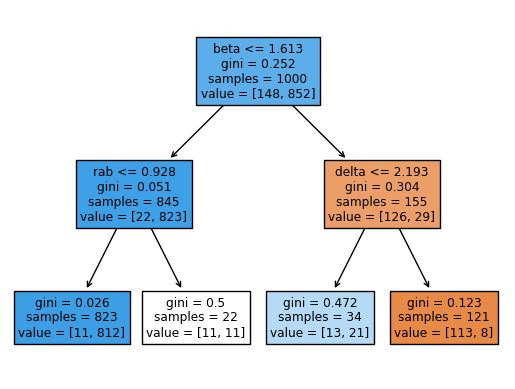

In [110]:
tree.plot_tree(clf, feature_names=X.columns, filled=True)

In [115]:
mask_series = (df['beta'] <= 1.613) & (df['rab'] <= 0.928)

In [113]:
mask_series = (df['delta'] <= 10) & (df['rab'] <= 0.052)

In [116]:
df[mask_series].describe()

,alpha,beta,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,rab,target
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,823.000000,823.000000
mean,2.435187,-0.630957,2.776592,0.584097,0.584097,0.584097,2.342800e-15,4.581488e-16,6.850931e-11,4.121377e-11,-0.117761,0.986634
std,2.596359,1.696019,2.807709,0.273842,0.273842,0.273842,2.310212e-14,1.114232e-15,1.946792e-09,1.172481e-09,0.534139,0.114905
min,0.004213,-9.254288,0.000292,0.000669,0.000669,0.000669,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.991549,0.000000
25%,0.721513,-0.881070,0.818621,0.394789,0.394789,0.394789,0.000000e+00,0.000000e+00,3.330669e-16,1.110223e-16,-0.556929,1.000000
50%,1.440114,-0.127772,1.513376,0.557025,0.557025,0.557025,2.220446e-16,1.110223e-16,1.221245e-15,6.661338e-16,-0.185769,1.000000
75%,3.036035,0.286300,4.611060,0.815019,0.815019,0.815019,8.881784e-16,3.608225e-16,6.161738e-15,3.247402e-15,0.297395,1.000000
max,9.916863,1.596882,9.997911,1.000000,1.000000,1.000000,5.250245e-13,1.043610e-14,5.584971e-08,3.363626e-08,0.924021,1.000000
